## Toxic App- DSC478 Final Project

#### Authors: *Jeffrey Bocek, Xuyang Ji & Anna-Lisa Vu*

### Notebook 2 - Data Exploration

Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import pickle 

from sklearn import decomposition

Load preprocessed (Notebook1) dataframes 

In [3]:
file_object = open('clean_data1.p', 'rb')
clean_data = pickle.load(file_object)
train_df = clean_data[0]
test_df = clean_data[1]
test_lab = clean_data[2]

Dataframe basics

In [4]:
train_df.head()

,comment_text,non_toxic,overall_toxic
0,explanation edit make username hardcore metall...,1,0
1,daww match background colour im seemingly stic...,1,0
2,hey man im really try edit war guy constantly ...,1,0
3,cant make real suggestion improvement wonder s...,1,0
4,sir hero chance remember page thats,1,0


In [5]:
train_df.describe()

,non_toxic,overall_toxic
count,159571.000000,159571.000000
mean,0.898321,0.101679
std,0.302226,0.302226
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


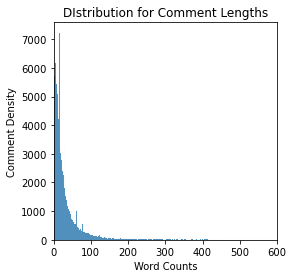

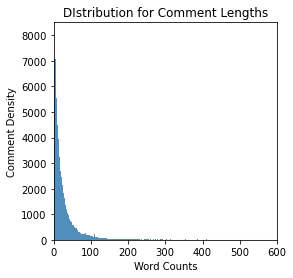

In [7]:
def plot_comment_lengths(df):
    #Checking comment lengths
    comm_len = df["comment_text"].str.split().apply(len)
    plt.figure(figsize=(4,4))
    sns.histplot(comm_len)
    plt.title("DIstribution for Comment Lengths")
    plt.xlim(0,600)
    plt.xlabel("Word Counts")
    plt.ylabel("Comment Density")
    plt.show()

plot_comment_lengths(train_df)


In [8]:
# Toxic vs. clean comment 
clean_comm= (train_df.iloc[:,2:].sum(axis=1)==0).sum(axis=0)
clean_comm
print("The clean comment ratio is:",(round(clean_comm/len(train_df),3)))

The clean comment ratio is: 0.898


In [15]:
def plot_labels(df, position):
    categories= list(df.columns.values[position:])
                 
    counts=[]
    for category in categories:
        count=train_df[category].sum()
        ratio= round(count/len(df),3)
        counts.append((category,count,ratio))
    category_stat = pd.DataFrame(counts, columns=["Class","Counts","Percentage"])
    category_stat
    plt.figure(figsize=(4,4))
    ax= sns.barplot(x="Class",y="Counts",data=category_stat)
    ax.bar_label(ax.containers[0])
    plt.title("Comments in Each Toxic Class")
    plt.ylabel('Comment Counts')
    plt.xlabel('Comment Class ')
    plt.rcParams.update({'font.size':4})
    ax.tick_params(labelsize=7)

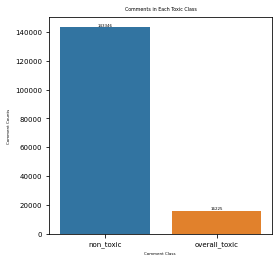

In [16]:
plot_labels(train_df, 1)

In [13]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland —
3,00017563c3f7919a,look back source information update correct fo...
4,00017695ad8997eb,dont anonymously edit article


In [14]:
test_lab.head()

,non_toxic,overall_toxic
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


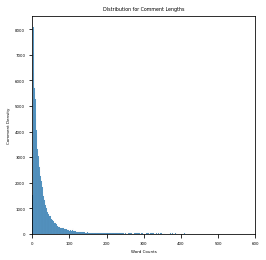

In [19]:
plot_comment_lengths(test_df)

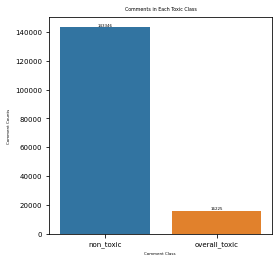

In [18]:
plot_labels(test_lab, 0)